## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing


## Training Image Preprocessing

In [16]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)   

Found 70295 files belonging to 38 classes.


### Validation Image PreProcessing

In [17]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [18]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [19]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[232.75 219.25 192.75]
   [217.75 203.5  181.25]
   [203.5  188.5  172.  ]
   ...
   [116.25 111.25 107.25]
   [115.25 110.25 106.25]
   [114.5  109.5  105.5 ]]

  [[208.25 197.75 176.  ]
   [187.   176.25 157.  ]
   [172.   160.25 146.75]
   ...
   [113.25 108.25 104.25]
   [112.75 107.75 103.75]
   [115.   110.   106.  ]]

  [[190.25 183.25 166.  ]
   [165.25 157.25 145.  ]
   [119.75 111.   103.5 ]
   ...
   [110.5  105.5  101.5 ]
   [110.75 105.75 101.75]
   [111.75 106.75 102.75]]

  ...

  [[140.   128.5  139.5 ]
   [132.5  126.5  119.5 ]
   [131.25 127.75 120.75]
   ...
   [108.   104.   105.  ]
   [108.5  104.5  105.5 ]
   [110.5  106.5  107.5 ]]

  [[136.25 124.75 135.75]
   [133.   127.   120.  ]
   [135.25 131.75 124.75]
   ...
   [113.   109.   110.  ]
   [113.5  109.5  110.5 ]
   [115.25 111.25 112.25]]

  [[138.   126.5  137.5 ]
   [138.75 132.75 125.75]
   [140.   136.5  129.5 ]
   ...
   [109.   105.   106.  ]
   [109.5  105.5  106.5 ]
   [111.5  107.5  10

### Building Model

### To avoid Overshooting
1. CHoose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of underfitting , so increase number of neurons
3. Add more convolution layer to extrarct more feature from images as there may be possibility that the model is unable to capture relevant feature or model is confusing due to lack of feature so feed more feature


#ALL THESE ASIDE - We have to keep our model between overfitting and inderfitting. So while increasing nerons and convolution layers , we need to drop some too!

In [20]:

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 
from tensorflow.keras.models import Sequential

model = Sequential()


In [21]:
## Building Convulation

In [22]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3] ))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [23]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [24]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu' ))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [25]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu' ))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [26]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [27]:
model.add(Dropout(0.25)) ## TO avoid overfitting

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(units=1500,activation ='relu'))


In [30]:
model.add(Dropout(0.4))

In [31]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [50]:
training_history= model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 203s 92ms/step - loss: 0.0967 - accuracy: 0.9687 - val_loss: 0.1140 - val_accuracy: 0.9651
Epoch 2/10
2197/2197 [==============================] - 201s 92ms/step - loss: 0.0786 - accuracy: 0.9745 - val_loss: 0.1309 - val_accuracy: 0.9631
Epoch 3/10
2197/2197 [==============================] - 201s 92ms/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 0.1132 - val_accuracy: 0.9680
Epoch 4/10
2197/2197 [==============================] - 201s 92ms/step - loss: 0.0610 - accuracy: 0.9802 - val_loss: 0.1309 - val_accuracy: 0.9636
Epoch 5/10
2197/2197 [==============================] - 205s 93ms/step - loss: 0.0538 - accuracy: 0.9828 - val_loss: 0.1366 - val_accuracy: 0.9638
Epoch 6/10
2197/2197 [==============================] - 204s 93ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0846 - val_accuracy: 0.9761
Epoch 7/10
2197/2197 [==============================] - 204s 93ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0

2197/2197 [==============================] - 203s 92ms/step - loss: 0.0967 - accuracy: 0.9687 - val_loss: 0.1140 - val_accuracy: 0.9651
Epoch 2/10
2197/2197 [==============================] - 201s 92ms/step - loss: 0.0786 - accuracy: 0.9745 - val_loss: 0.1309 - val_accuracy: 0.9631
Epoch 3/10
2197/2197 [==============================] - 201s 92ms/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 0.1132 - val_accuracy: 0.9680
Epoch 4/10
2197/2197 [==============================] - 201s 92ms/step - loss: 0.0610 - accuracy: 0.9802 - val_loss: 0.1309 - val_accuracy: 0.9636
Epoch 5/10
2197/2197 [==============================] - 205s 93ms/step - loss: 0.0538 - accuracy: 0.9828 - val_loss: 0.1366 - val_accuracy: 0.9638
Epoch 6/10
2197/2197 [==============================] - 204s 93ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0846 - val_accuracy: 0.9761
Epoch 7/10
2197/2197 [==============================] - 204s 93ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.1145 - val

### Model Evaluation

In [51]:
#MOdel EValuation on Training Set

train_loss,train_acc=model.evaluate(training_set)
print(train_loss,train_acc)

2197/2197 [==============================] - 61s 28ms/step - loss: 0.0289 - accuracy: 0.9914
0.028934171423316002 0.9914076328277588


In [52]:
#Model EValuation on Validation set
train_loss,train_acc=model.evaluate(validation_set)
print(train_loss,train_acc)

550/550 [==============================] - 15s 28ms/step - loss: 0.1138 - accuracy: 0.9659
0.11382422596216202 0.9658547639846802


### Saving Model

In [53]:
model.save("trained_model.keras")

In [54]:
training_history.history['val_accuracy']

[0.965114951133728,
 0.9631231427192688,
 0.9679604172706604,
 0.9636353254318237,
 0.9638060331344604,
 0.976098358631134,
 0.9685863852500916,
 0.9646596908569336,
 0.9750739932060242,
 0.9658547639846802]

#### Recording History in Json

In [55]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

In [56]:
print(training_history.history.keys())
print(len(training_history.history['accuracy']))  # Length of training accuracy
print(len(training_history.history['val_accuracy']))  # Length of validation accuracy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
10
10


### Accuracy Visualisation

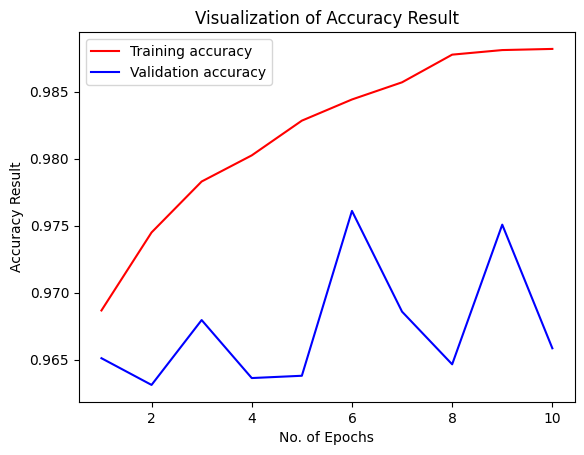

In [57]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")  
plt.legend()
plt.show()


### SOme other Metrics for Model Evaluation

In [58]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [59]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle= False, # Specifically put false , then entire datser passed sequenrtial
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [60]:
y_pred= model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 14s 26ms/step


(array([[9.9999988e-01, 2.4643544e-11, 8.6122022e-13, ..., 8.3115099e-15,
         4.9118580e-14, 3.5656265e-14],
        [9.9992144e-01, 2.3672051e-06, 4.7349535e-10, ..., 3.5144443e-11,
         7.2015914e-11, 1.3338698e-10],
        [1.0000000e+00, 2.2518936e-11, 1.6072804e-13, ..., 2.9846455e-19,
         3.9063585e-16, 5.7450863e-14],
        ...,
        [1.2348509e-12, 1.8780071e-14, 7.0023987e-11, ..., 1.5120556e-13,
         2.6563281e-13, 9.9999976e-01],
        [2.3690699e-10, 1.6036702e-12, 1.4212278e-09, ..., 3.7007380e-11,
         2.3601490e-10, 9.9999571e-01],
        [5.5570920e-18, 7.8198791e-19, 4.5243017e-17, ..., 1.7623091e-20,
         5.9750750e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [61]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [63]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [64]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.95      0.98      0.96       502
                               Blueberry___healthy       0.99      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.94      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [70]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[488,   2,   0, ...,   0,   0,   0],
       [  2, 487,   2, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 461,   3,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   1, ...,   0,   0, 478]], dtype=int64)

### Confusion Matrix visualisation

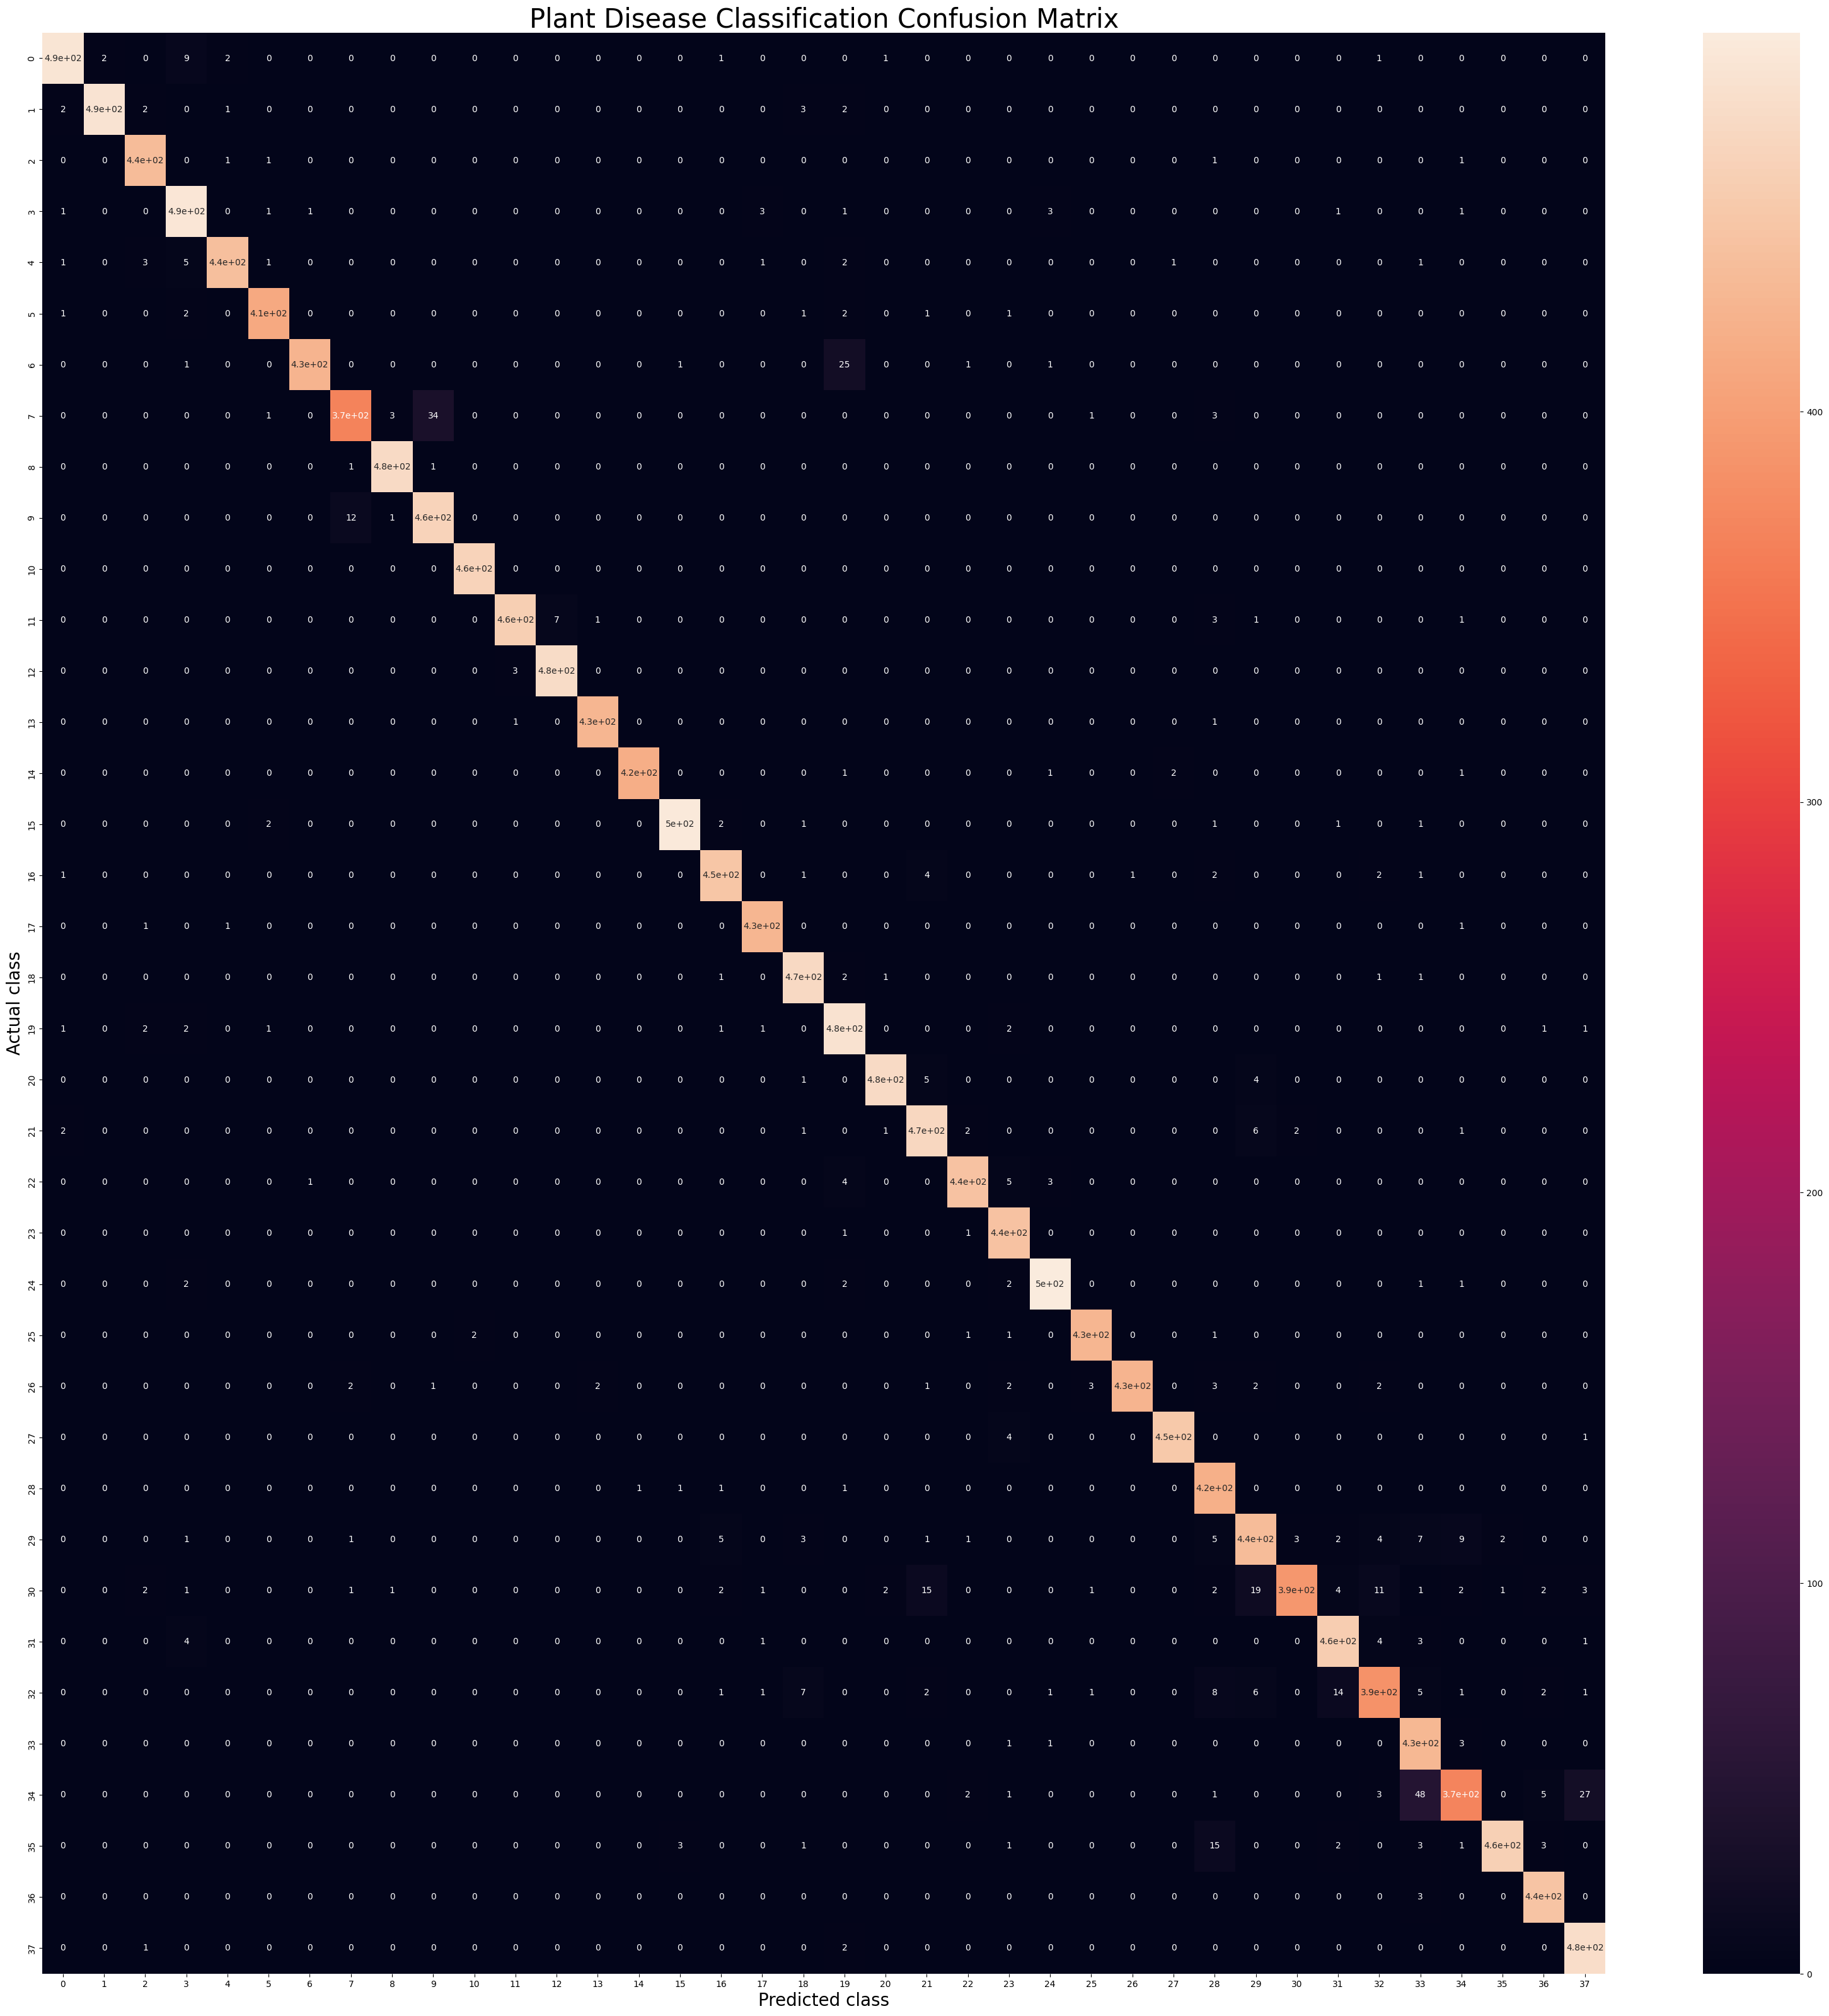

In [82]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Classification Confusion Matrix",fontsize=30)
plt.show()